# 服务器端程序 调试

In [1]:
# -*- coding: utf-8 -*-
"""
MNE package trial
"""

import json
import numpy as np

import mne
from mne import baseline
from mne.channels.montage import get_builtin_montages
from mne.datasets import fetch_fsaverage
from mne.viz import set_3d_title, set_3d_view

import os
import pyedflib
from scipy import stats, signal
import pandas as pd
from matplotlib import pyplot as plt

###############################################################################
# Loading data

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file, preload = True)

###############################################################################

Opening raw data file C:\Users\WillKD\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 41699  =      0.000 ...   277.709 secs...


In [2]:
# get a gliMpse of the data
print(raw)
print(raw.info)

<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~122.9 MB, data loaded>
<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 GRAD, 102 MAG, 9 STIM, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


In [3]:
# remove some data (MEG not used in this trial)
raw.drop_channels(['MEG 0113', 'MEG 0112', 'MEG 0111', 'MEG 0122', 'MEG 0123', 'MEG 0121', 'MEG 0132', 
                   'MEG 0133', 'MEG 0131', 'MEG 0143', 'MEG 0142', 'MEG 0141', 'MEG 0213', 'MEG 0212', 
                   'MEG 0211', 'MEG 0222', 'MEG 0223', 'MEG 0221', 'MEG 0232', 'MEG 0233', 'MEG 0231', 
                   'MEG 0243', 'MEG 0242', 'MEG 0241', 'MEG 0313', 'MEG 0312', 'MEG 0311', 'MEG 0322', 
                   'MEG 0323', 'MEG 0321', 'MEG 0333', 'MEG 0332', 'MEG 0331', 'MEG 0343', 'MEG 0342', 
                   'MEG 0341', 'MEG 0413', 'MEG 0412', 'MEG 0411', 'MEG 0422', 'MEG 0423', 'MEG 0421', 
                   'MEG 0432', 'MEG 0433', 'MEG 0431', 'MEG 0443', 'MEG 0442', 'MEG 0441', 'MEG 0513', 
                   'MEG 0512', 'MEG 0511', 'MEG 0523', 'MEG 0522', 'MEG 0521', 'MEG 0532', 'MEG 0533', 
                   'MEG 0531', 'MEG 0542', 'MEG 0543', 'MEG 0541', 'MEG 0613', 'MEG 0612', 'MEG 0611', 
                   'MEG 0622', 'MEG 0623', 'MEG 0621', 'MEG 0633', 'MEG 0632', 'MEG 0631', 'MEG 0642', 
                   'MEG 0643', 'MEG 0641', 'MEG 0713', 'MEG 0712', 'MEG 0711', 'MEG 0723', 'MEG 0722', 
                   'MEG 0721', 'MEG 0733', 'MEG 0732', 'MEG 0731', 'MEG 0743', 'MEG 0742', 'MEG 0741', 
                   'MEG 0813', 'MEG 0812', 'MEG 0811', 'MEG 0822', 'MEG 0823', 'MEG 0821', 'MEG 0913', 
                   'MEG 0912', 'MEG 0911', 'MEG 0923', 'MEG 0922', 'MEG 0921', 'MEG 0932', 'MEG 0933', 
                   'MEG 0931', 'MEG 0942', 'MEG 0943', 'MEG 0941', 'MEG 1013', 'MEG 1012', 'MEG 1011', 
                   'MEG 1023', 'MEG 1022', 'MEG 1021', 'MEG 1032', 'MEG 1033', 'MEG 1031', 'MEG 1043', 
                   'MEG 1042', 'MEG 1041', 'MEG 1112', 'MEG 1113', 'MEG 1111', 'MEG 1123', 'MEG 1122', 
                   'MEG 1121', 'MEG 1133', 'MEG 1132', 'MEG 1131', 'MEG 1142', 'MEG 1143', 'MEG 1141', 
                   'MEG 1213', 'MEG 1212', 'MEG 1211', 'MEG 1223', 'MEG 1222', 'MEG 1221', 'MEG 1232', 
                   'MEG 1233', 'MEG 1231', 'MEG 1243', 'MEG 1242', 'MEG 1241', 'MEG 1312', 'MEG 1313', 
                   'MEG 1311', 'MEG 1323', 'MEG 1322', 'MEG 1321', 'MEG 1333', 'MEG 1332', 'MEG 1331', 
                   'MEG 1342', 'MEG 1343', 'MEG 1341', 'MEG 1412', 'MEG 1413', 'MEG 1411', 'MEG 1423', 
                   'MEG 1422', 'MEG 1421', 'MEG 1433', 'MEG 1432', 'MEG 1431', 'MEG 1442', 'MEG 1443', 
                   'MEG 1441', 'MEG 1512', 'MEG 1513', 'MEG 1511', 'MEG 1522', 'MEG 1523', 'MEG 1521', 
                   'MEG 1533', 'MEG 1532', 'MEG 1531', 'MEG 1543', 'MEG 1542', 'MEG 1541', 'MEG 1613', 
                   'MEG 1612', 'MEG 1611', 'MEG 1622', 'MEG 1623', 'MEG 1621', 'MEG 1632', 'MEG 1633', 
                   'MEG 1631', 'MEG 1643', 'MEG 1642', 'MEG 1641', 'MEG 1713', 'MEG 1712', 'MEG 1711', 
                   'MEG 1722', 'MEG 1723', 'MEG 1721', 'MEG 1732', 'MEG 1733', 'MEG 1731', 'MEG 1743', 
                   'MEG 1742', 'MEG 1741', 'MEG 1813', 'MEG 1812', 'MEG 1811', 'MEG 1822', 'MEG 1823', 
                   'MEG 1821', 'MEG 1832', 'MEG 1833', 'MEG 1831', 'MEG 1843', 'MEG 1842', 'MEG 1841', 
                   'MEG 1912', 'MEG 1913', 'MEG 1911', 'MEG 1923', 'MEG 1922', 'MEG 1921', 'MEG 1932', 
                   'MEG 1933', 'MEG 1931', 'MEG 1943', 'MEG 1942', 'MEG 1941', 'MEG 2013', 'MEG 2012', 
                   'MEG 2011', 'MEG 2023', 'MEG 2022', 'MEG 2021', 'MEG 2032', 'MEG 2033', 'MEG 2031', 
                   'MEG 2042', 'MEG 2043', 'MEG 2041', 'MEG 2113', 'MEG 2112', 'MEG 2111', 'MEG 2122', 
                   'MEG 2123', 'MEG 2121', 'MEG 2133', 'MEG 2132', 'MEG 2131', 'MEG 2143', 'MEG 2142', 
                   'MEG 2141', 'MEG 2212', 'MEG 2213', 'MEG 2211', 'MEG 2223', 'MEG 2222', 'MEG 2221', 
                   'MEG 2233', 'MEG 2232', 'MEG 2231', 'MEG 2242', 'MEG 2243', 'MEG 2241', 'MEG 2312', 
                   'MEG 2313', 'MEG 2311', 'MEG 2323', 'MEG 2322', 'MEG 2321', 'MEG 2332', 'MEG 2333', 
                   'MEG 2331', 'MEG 2343', 'MEG 2342', 'MEG 2341', 'MEG 2412', 'MEG 2413', 'MEG 2411', 
                   'MEG 2423', 'MEG 2422', 'MEG 2421', 'MEG 2433', 'MEG 2432', 'MEG 2431', 'MEG 2442', 
                   'MEG 2443', 'MEG 2441', 'MEG 2512', 'MEG 2513', 'MEG 2511', 'MEG 2522', 'MEG 2523', 
                   'MEG 2521', 'MEG 2533', 'MEG 2532', 'MEG 2531', 'MEG 2543', 'MEG 2542', 'MEG 2541', 
                   'MEG 2612', 'MEG 2613', 'MEG 2611', 'MEG 2623', 'MEG 2622', 'MEG 2621', 'MEG 2633', 
                   'MEG 2632', 'MEG 2631', 'MEG 2642', 'MEG 2643', 'MEG 2641', 'STI 001', 'STI 002', 
                   'STI 003', 'STI 004', 'STI 005', 'STI 006', 'STI 015', 'STI 016', 'EOG 061'] )


print(raw.info.ch_names)

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>
['STI 014', 'EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008', 'EEG 009', 'EEG 010', 'EEG 011', 'EEG 012', 'EEG 013', 'EEG 014', 'EEG 015', 'EEG 016', 'EEG 017', 'EEG 018', 'EEG 019', 'EEG 020', 'EEG 021', 'EEG 022', 'EEG 023', 'EEG 024', 'EEG 025', 'EEG 026', 'EEG 027', 'EEG 028', 'EEG 029', 'EEG 030', 'EEG 031', 'EEG 032', 'EEG 033', 'EEG 034', 'EEG 035', 'EEG 036', 'EEG 037', 'EEG 038', 'EEG 039', 'EEG 040', 'EEG 041', 'EEG 042', 'EEG 043', 'EEG 044', 'EEG 045', 'EEG 046', 'EEG 047', 'EEG 048', 'EEG 049', 'EEG 050', 'EEG 051', 'EEG 052', 'EEG 053', 'EEG 054', 'EEG 055', 'EEG 056', 'EEG 057', 'EEG 058', 'EEG 059', 'EEG 060']


Fitting ICA to data using 59 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 2.4s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


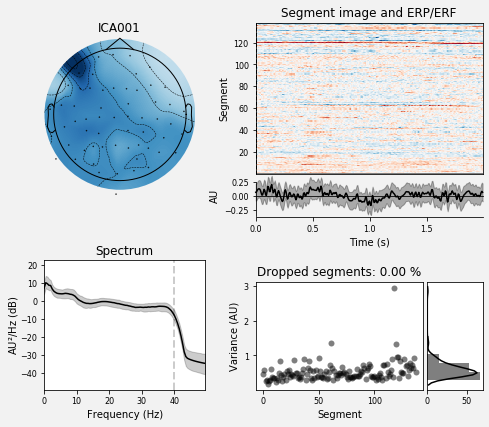

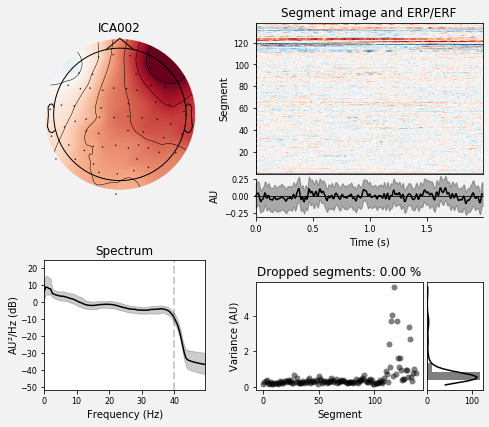

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [4]:
# preprocessing

# note that ICA is skipped as before

# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 59 PCA components


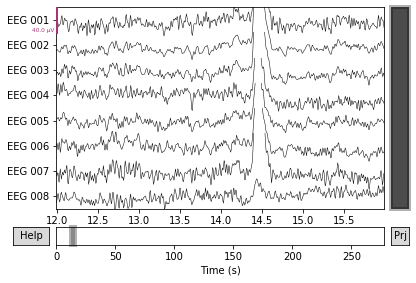

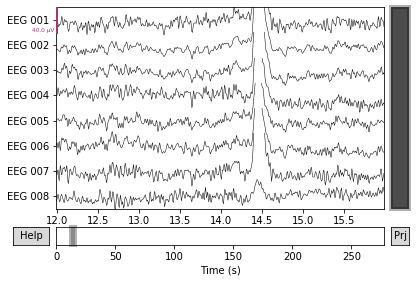

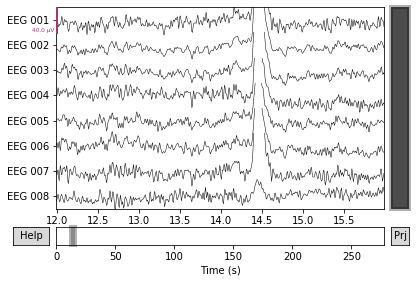

In [5]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)

# show some frontal channels to clearly illustrate the artifact removal
chs = ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006',
       'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
orig_raw.plot(order=chan_idxs, start=12, duration=4)
raw.plot(order=chan_idxs, start=12, duration=4)

In [6]:
events = mne.find_events(raw, stim_channel='STI 014')
print(events[:5])  # show the first 5

319 events found
Event IDs: [ 1  2  3  4  5 32]
[[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]]


In [7]:
event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4, 'smiley': 5, 'buttonpress': 32}

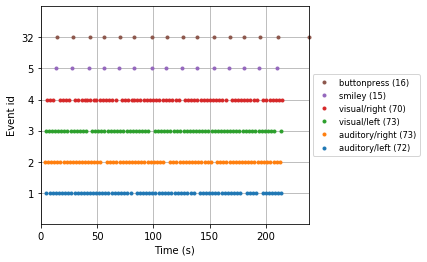

In [8]:
fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)

Not setting metadata
Not setting metadata
319 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 319 events and 106 original time points ...
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003']
    Rejecting  epoch based on EEG : ['EEG 008']
2 bad epochs dropped
Dropped 7 epochs: 0, 1, 14, 17, 34, 100, 230
Not setting metadata
Not setting metadata
70 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
70 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


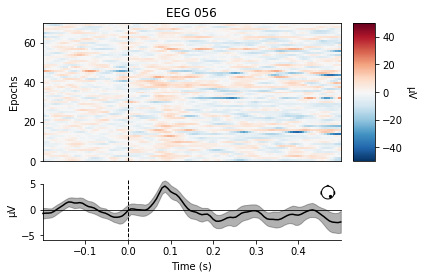

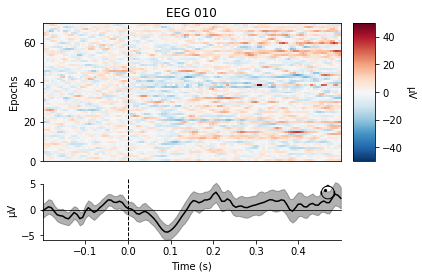

[<Figure size 432x288 with 4 Axes>, <Figure size 432x288 with 4 Axes>]

In [9]:
# .. _tut-section-overview-epoching:
#
# Epoching continuous data
# ^^^^^^^^^^^^^^^^^^^^^^^^
#
# The :class:`~mne.io.Raw` object and the events array are the bare minimum
# needed to create an :class:`~mne.Epochs` object, which we create with the
# :class:`~mne.Epochs` class constructor. Here we'll also specify some data
# quality constraints: we'll reject any epoch where peak-to-peak signal
# amplitude is beyond reasonable limits for that channel type. This is done
# with a *rejection dictionary*; you may include or omit thresholds for any of
# the channel types present in your data. The values given here are reasonable
# for this particular dataset, but may need to be adapted for different
# hardware or recording conditions. For a more automated approach, consider
# using the `autoreject package`_.

reject_criteria = dict(eeg=150e-6)       # 150 µV      

###############################################################################
# We'll also pass the event dictionary as the ``event_id`` parameter (so we can
# work with easy-to-pool event labels instead of the integer event IDs), and
# specify ``tmin`` and ``tmax`` (the time relative to each event at which to
# start and end each epoch). As mentioned above, by default
# :class:`~mne.io.Raw` and :class:`~mne.Epochs` data aren't loaded into memory
# (they're accessed from disk only when needed), but here we'll force loading
# into memory using the ``preload=True`` parameter so that we can see the
# results of the rejection criteria being applied:

epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.2, tmax=0.5,
                    reject=reject_criteria, preload=True)

###############################################################################
# Next we'll pool across left/right stimulus presentations so we can compare
# auditory versus visual responses. To avoid biasing our signals to the
# left or right, we'll use :meth:`~mne.Epochs.equalize_event_counts` first to
# randomly sample epochs from each condition to match the number of epochs
# present in the condition with the fewest good epochs.

conds_we_care_about = ['auditory/left', 'auditory/right',
                       'visual/left', 'visual/right']
epochs.equalize_event_counts(conds_we_care_about)  # this operates in-place
aud_epochs = epochs['auditory/right']
vis_epochs = epochs['visual/left']

###############################################################################
# Like :class:`~mne.io.Raw` objects, :class:`~mne.Epochs` objects also have a
# number of built-in plotting methods. One is :meth:`~mne.Epochs.plot_image`,
# which shows each epoch as one row of an image map, with color representing
# signal magnitude; the average evoked response and the sensor location are
# shown below the image:

aud_epochs.plot_image(picks=['EEG 056', 'EEG 010'])

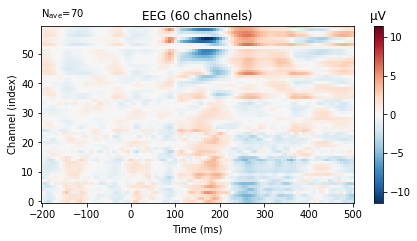

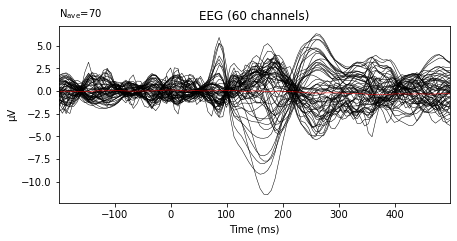

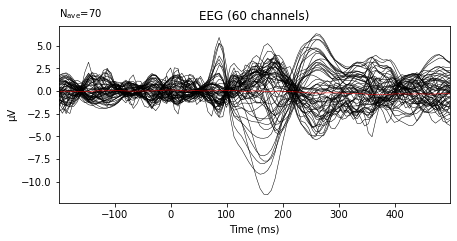

In [10]:
###############################################################################
# Estimating evoked responses
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^
#
# Now that we have our conditions in ``aud_epochs`` and ``vis_epochs``, we can
# get an estimate of evoked responses to auditory versus visual stimuli by
# averaging together the epochs in each condition. This is as simple as calling
# the :meth:`~mne.Epochs.average` method on the :class:`~mne.Epochs` object,
# and then using a function from the :mod:`mne.viz` module to compare the
# global field power for each sensor type of the two :class:`~mne.Evoked`
# objects:

aud_evoked = aud_epochs.average()
vis_evoked = vis_epochs.average()

evoked = vis_evoked


######################################plot images

evoked.plot_image(exclude=[], time_unit='ms')
evoked.plot(exclude=[], time_unit='ms')

# sphere = mne.make_sphere_model(r0='auto', head_radius='auto', info=info)
# # Plot options
# fig = mne.viz.plot_alignment(
#     show_axes=True, dig='fiducials', surfaces='head',
#     bem=sphere, info=info)
# set_3d_view(figure=fig, azimuth=135, elevation=80)
# set_3d_title(figure=fig, title='standard_1020')

In [24]:
#############################################compute inverse operator

from mne import setup_volume_source_space
from mne.datasets import sample
from mne.minimum_norm import make_inverse_operator, apply_inverse

import os.path as op
import matplotlib.pyplot as plt
from nilearn import plotting
import codecs

#set dir
data_path = mne.datasets.sample.data_path()
subject = 'sample'
data_dir = op.join(data_path, 'MEG', subject)
subjects_dir = op.join(data_path, 'subjects')
bem_dir = op.join(subjects_dir, subject, 'bem')

#set file names
fname_aseg = op.join(subjects_dir, subject, 'mri', 'aseg.mgz')

fname_model = op.join(bem_dir, '%s-5120-5120-5120-bem.fif' % subject)
fname_bem = op.join(bem_dir, '%s-5120-5120-5120-bem-sol.fif' % subject)

fname_trans = data_dir + '/sample_audvis_raw-trans.fif'

# Now we create a mixed src space by adding the volume regions specified in the
# list labels_vol. First, read the aseg file and the source space bounds
# using the inner skull surface (here using 10mm spacing to save time,
# we recommend something smaller like 5.0 in actual analyses):

src = mne.setup_volume_source_space(
    subject, mri=fname_aseg, pos=10.0, bem=fname_model,
    #volume_label=labels_vol,
    subjects_dir=subjects_dir,
    add_interpolator=False,  # just for speed, usually this should be True
    verbose=True)

# Visualize the source space.
src.plot(subjects_dir=subjects_dir)

n = sum(src[i]['nuse'] for i in range(len(src)))
print('the src space contains %d spaces and %d points' % (len(src), n))

# Compute the fwd matrix
fwd = mne.make_forward_solution(
    info = evoked.info, trans = fname_trans,
    src = src, bem = fname_bem,
    mindist=5.0,  # ignore sources<=5mm from innerskull
    meg=False, eeg=True, n_jobs=1)

leadfield = fwd['sol']['data']
print("Leadfield size : %d sensors x %d dipoles" % leadfield.shape)

src_fwd = fwd['src']
n = sum(src_fwd[i]['nuse'] for i in range(len(src_fwd)))
print('the fwd src space contains %d spaces and %d points' % (len(src_fwd), n))

# Compute inverse operator
# Compute noise covariance matrix
noise_cov = mne.compute_covariance(epochs = epochs)

# Compute inverse solution and for each epoch
snr = 3.0            # use smaller SNR for raw data
inv_method = 'dSPM'  # sLORETA, MNE, dSPM
parc = 'aparc'       # the parcellation to use, e.g., 'aparc' 'aparc.a2009s'

lambda2 = 1.0 / snr ** 2

# Compute inverse operator
inverse_operator = make_inverse_operator(evoked.info, fwd, noise_cov,
                                         depth=None, fixed=False)

# Compute inverse solution
stc = apply_inverse(evoked, inverse_operator, lambda2, inv_method)

# Export result as a 4D nifti object
img = stc.as_volume(src,
                    mri_resolution=False)  # set True for full MRI resolution


# Plotting with nilearn ######################################################
# plot_stat_map(index_img(img, 61), t1_fname, threshold=8.,
#               title='%s (t=%.1f s.)' % (method, stc.times[61]))

# plot with morphing (slow)
#morph = mne.compute_source_morph(src, subject_to='fsaverage', subjects_dir=subjects_dir)  
fig = stc.plot(src, subjects_dir=subjects_dir, )

print(stc.shape)
print(stc.vertices.shape)
print(src)
print(img.dataobj.shape)

#convert the result to discrete values between 0-255
arr = img.dataobj;
M = 255/arr.max()
multiplier = np.ones(arr.shape)
multiplier = multiplier * M;
arr = arr * multiplier;
arr = arr.astype(np.int)

#discard small values (<=24)
# for i in range(0, arr.shape[0]):
#     for j in range(0, arr.shape[1]):
#         for k in range(0, arr.shape[2]):
#             for t in range(0, arr.shape[3]):
#                 if arr[i,j,k,t] < 25:
#                     arr[i,j,k,t] = 0

#make dense matrix
L = 0;
T = arr.shape[3];
for t in range(0, T):
    t_slice = arr[:,:,:,t]
    nz = t_slice.nonzero()
    if len(nz[0]) > L:
        L = len(nz[0])
print("Maximum active points: ", L)

dense = np.ones([L,5,T], dtype = np.int)
dense = dense * -1;
for t in range(0, T):
    t_slice = arr[:,:,:,t]
    nz = t_slice.nonzero()
    for i in range(0, len(nz[0])):
        dense[i, :, t] = [i, nz[0][i], nz[1][i], nz[2][i], 
                          t_slice[nz[0][i], nz[1][i], nz[2][i]]]

#dump to json
print(dense.shape)
tmp = dense.tolist()
tmp_sparse = arr.tolist()

file_path = "D:/Workspaces/MNEdata/project_data/source-estimates-dense-p100.json"
json.dump(tmp, codecs.open(file_path, 'w', encoding='utf-8'),
          separators = (',', ':'))

file_path = "D:/Workspaces/MNEdata/project_data/source-estimates-sparse-p100.json"
json.dump(tmp_sparse, codecs.open(file_path, 'w', encoding='utf-8'),
          separators = (',', ':'))

file_path = "D:/Workspaces/MNEdata/project_data/source-estimates-p100.json"
json.dump(img.dataobj.tolist(), codecs.open(file_path, 'w', encoding='utf-8'),
          separators = (',', ':'))

BEM              : C:\Users\WillKD\mne_data\MNE-sample-data\subjects\sample\bem\sample-5120-5120-5120-bem.fif
grid                  : 10.0 mm
mindist               : 5.0 mm
MRI volume            : C:\Users\WillKD\mne_data\MNE-sample-data\subjects\sample\mri\aseg.mgz

Reading C:\Users\WillKD\mne_data\MNE-sample-data\subjects\sample\mri\aseg.mgz...

Loaded inner skull from C:\Users\WillKD\mne_data\MNE-sample-data\subjects\sample\bem\sample-5120-5120-5120-bem.fif (2562 nodes)
Surface CM = (   0.7  -10.0   44.3) mm
Surface fits inside a sphere with radius   91.8 mm
Surface extent:
    x =  -66.7 ...   68.8 mm
    y =  -88.0 ...   79.0 mm
    z =  -44.5 ...  105.8 mm
Grid extent:
    x =  -70.0 ...   70.0 mm
    y =  -90.0 ...   80.0 mm
    z =  -50.0 ...  110.0 mm
4590 sources before omitting any.
2961 sources after omitting infeasible sources not within 0.0 - 91.8 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface and at least    5.0 mm away (will t

RuntimeError: Could not load any valid 3D backend: pyvista, mayavi, notebook

In [14]:
from pyvista import examples
from pyvista import demos

# list all examples
print(dir(examples))

# list all demos
print(dir(demos))

ModuleNotFoundError: No module named 'vtkIOParallelPython'

In [13]:
import pyvista

ModuleNotFoundError: No module named 'vtkIOParallelPython'